In [48]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
simulator = AerSimulator()

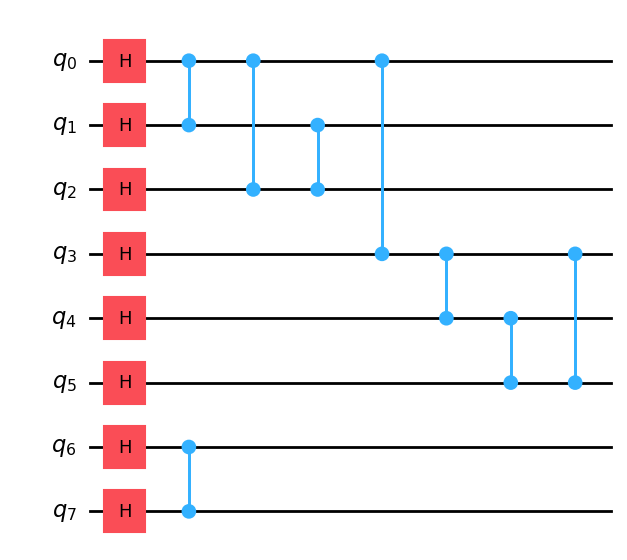

In [49]:
n = 8
edges = [[0,1],[0,2],[1,2],[0,3],[3,4],[4,5],[3,5],[6,7]]
circ = qiskit.QuantumCircuit(n)
for i in range(n):
    circ.h(i)
for edge in edges:
    circ.cz(edge[0],edge[1])
circ.draw("mpl",style="iqp")

In [50]:
# THIS TELLS US THAT THERE IS A TEST FOR GRAPH-STATE:
#  if applying a hadamard to a qbit, get 2^n / 2 states

numShots = 1024*4

for i in range(n):
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(i)
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts(0)
    print("output states with nonzero probability is at least: ", len(counts))
# qiskit.visualization.plot_histogram(counts_ideal)

output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128


In [56]:
# TESTING if we can get the existence of a single edge
#  if edge, hadamard the two nodes gives 2^n states
testEdges = edges
supportSizes = []
for testEdge in testEdges:
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(testEdge[0])
    circ.h(testEdge[1])
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts()
    supportSizes.append(len(counts))
    print(len(counts))
unique, counts = np.unique(supportSizes, return_counts=True)
print(unique, counts)

256
256
256
256
256
256
256
256
[256] [8]


In [57]:
#  if not an edge, hadamard the two nodes gives 2^n / 4 states
allDyads = [[j,i] for i in range(n) for j in range(i)]
supportSizes = []
for testEdge in allDyads:
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(testEdge[0])
    circ.h(testEdge[1])
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts()
    supportSizes.append(len(counts))
    print(len(counts))
np.histogram(supportSizes)[0]

256
256
256
256
64
64
64
64
64
256
64
64
64
256
256
64
64
64
64
64
64
64
64
64
64
64
64
256


array([20,  0,  0,  0,  0,  0,  0,  0,  0,  8])